<a href="https://colab.research.google.com/github/Pysrdafoice/Moldando_Matriz_VL_/blob/main/Matrizes_de_vl2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**metricas de avaliação**

In [ ]:
fp = 40
fn = 15
vp = 70
vn = 10


sensibilidade = vp / (vp + fn)
especificidade = vn / (vn + fp)
precisao = vp / (vp + fp)
accuracia = (vp + vn) / (vp + fn + vn + fp)
fscore = 2 * (precisao * sensibilidade) / (sensibilidade + precisao)


In [ ]:
#plorar matriz de confusao
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrix_with_metrics(sensibilidade, especificidade, precisao, accuracia, fscore, title):

    cm = np.array([[sensibilidade, 1 - especificidade], [1 - sensibilidade, especificidade]])
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.tight_layout()
    metrics_text = f"""Sensibilidade: {sensibilidade:.2f}
Especificidade: {especificidade:.2f}
Precisão: {precisao:.2f}
Acurácia: {accuracia:.2f}
F-score: {fscore:.2f}"""
    plt.gcf().text(0.99, 0.5, metrics_text, fontsize=10, va='center', ha='left', bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray'))

    plt.show()


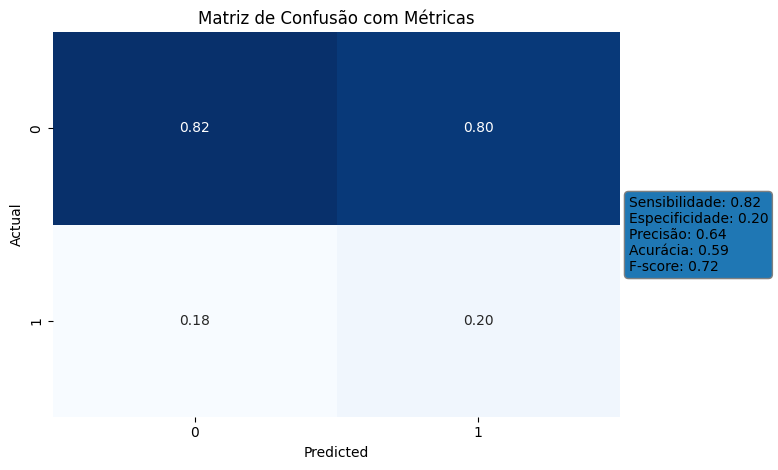

In [ ]:
plot_confusion_matrix_with_metrics(sensibilidade, especificidade, precisao, accuracia, fscore, 'Matriz de Confusão com Métricas')


In [ ]:
#grafico de ROC
from sklearn.metrics import roc_curve, auc

def plot_roc_curve_with_metrics(y_test, y_pred, sensibilidade, especificidade, precisao, accuracia, fscore):
    # Calculando curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plotando a curva
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')

    # Adicionando as métricas na legenda
    metrics_text = f"""Sensibilidade: {sensibilidade:.2f}
Especificidade: {especificidade:.2f}
Precisão: {precisao:.2f}
Acurácia: {accuracia:.2f}
F-score: {fscore:.2f}"""
    plt.legend(loc="lower right", title=metrics_text)
    plt.show()


IndentationError: unexpected indent (<ipython-input-29-373e21b7aa92>, line 25)

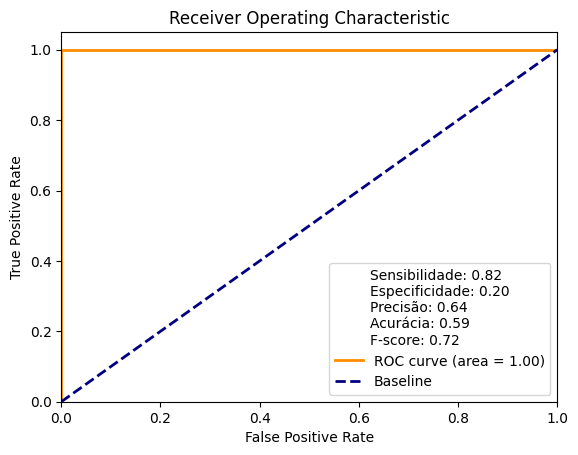

In [ ]:
y_test = np.array([0, 1, 1, 0, 1, 0, 1, 0])  # Verdadeiro
y_pred = np.array([0.2, 0.8, 0.6, 0.3, 0.9, 0.1, 0.7, 0.4])  # Previsão
plot_roc_curve_with_metrics(y_test, y_pred, sensibilidade, especificidade, precisao, accuracia, fscore)


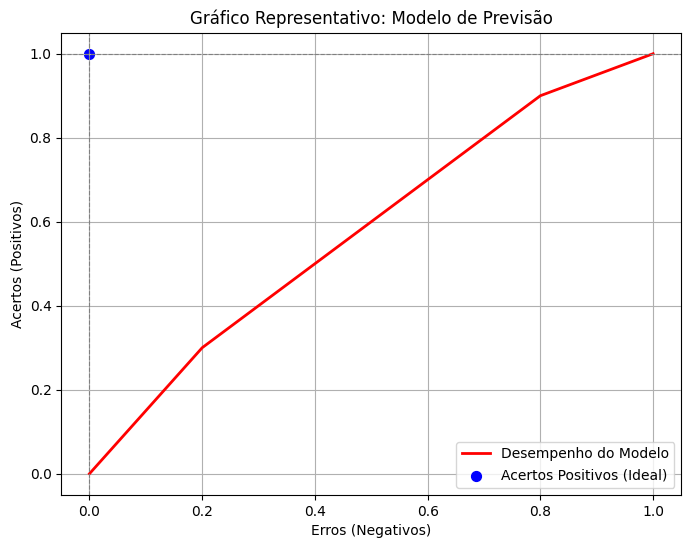

In [ ]:
x_vals = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]  # Valores no eixo X (erros ou negativos)
y_vals = [0.0, 0.3, 0.5, 0.7, 0.9, 1.0]  # Valores no eixo Y (acertos ou positivos)

# Criar o gráfico
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, color='red', label='Desempenho do Modelo', linewidth=2)  # Linha do modelo
plt.scatter([0], [1], color='blue', s=50, label='Acertos Positivos (Ideal)')  # Ponto azul no eixo Y

# Ajustar o layout
plt.title('Gráfico Representativo: Modelo de Previsão')
plt.xlabel('Erros (Negativos)')
plt.ylabel('Acertos (Positivos)')
plt.axhline(1, color='gray', linestyle='--', linewidth=0.8)  # Linha de referência no Y
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  # Linha de referência no X
plt.legend(loc='best')
plt.grid(True)
plt.show()
